In [36]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from scipy.optimize import curve_fit

In [3]:
t1_df = pd.read_hdf('t1_run884.h5', key='/ORSIS3302DecoderForEnergy')
energy = t1_df.energy

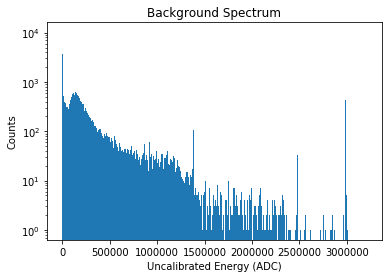

In [86]:
hist, bins, _ = plt.hist(energy, 5000)
plt.yscale('log')
plt.title('Background Spectrum')
plt.xlabel('Uncalibrated Energy (ADC)')
plt.ylabel('Counts')
plt.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  """


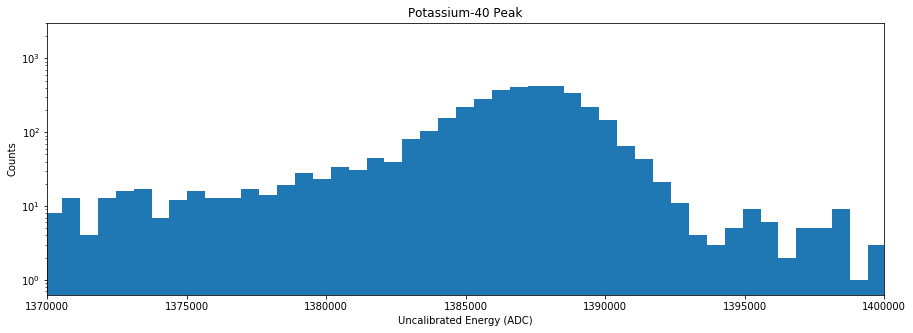

In [95]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
K_hist, K_bins, _ = plt.hist(energy, 5000, align='mid')
plt.yscale('log')
plt.xlim(1370000, 1400000)
plt.ylim(0, 3000)
plt.title('Potassium-40 Peak')
plt.xlabel('Uncalibrated Energy (ADC)')
plt.ylabel('Counts')
plt.show()

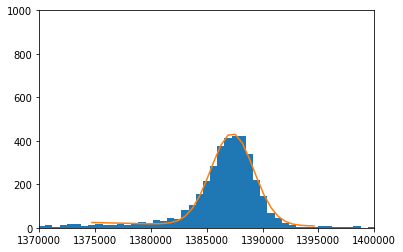

(421.66188038366886, 1387290.7520097543, 2715.7226845144387, -5.329184759452992e-05, 76.45811132704384)


In [97]:
bin_width = K_bins[1] - K_bins[0]

start_index = int(1375000 / bin_width)
stop_index = int(1395000 / bin_width)

fit_bins = np.array(K_bins[start_index:stop_index]) + bin_width / 2
fit_hist = K_hist[start_index:stop_index]

initial_pars = [2.64399e+03, 1.38688e+06, 2.46480e+03, -9.77407e-06, 1.77002e+01]

def func(x, a, b, c, d, f):
    return a * np.exp(-((x - b) / c ) ** 2) + np.exp(d * x + f)

popt, pcov = curve_fit(func, fit_bins, fit_hist, p0=initial_pars)

plt.hist(energy, 5000)
#plt.step(fit_bins, fit_hist)
plt.plot(fit_bins, func(fit_bins, *popt))
plt.xlim(1370000, 1400000)
plt.ylim(0, 1000)
#plt.yscale('log')
plt.show()

print(tuple(popt))

EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.64399e+03   5.44184e+01   5.08050e-02  -1.65629e-07
   2  p1           1.38688e+06   5.15774e+01  -3.99430e-02  -2.18347e-07
   3  p2           2.46480e+03   3.16596e+01  -4.38318e-02  -1.32430e-07
   4  p3           1.77002e+01   2.32143e+00   1.42519e-04  -2.28596e-03
   5  p4          -9.77407e-06   1.69693e-06  -6.75818e-11  -3.16365e+03